In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# reading the data and looking at the first five rows of the data
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# statistics of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
X = df.iloc[:,:-1].values
X.shape


#""The feature matrix contains the values of all 4 features in the dataset.It  is a 150x4 two-dimensional Numpy array. It is stored in the X variable."""

(150, 4)

In [5]:
#Here, we see that there is a lot of variation in the magnitude of the data.
# we need to standardize the data as the magnitude can affect the cluster

#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [6]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [7]:
# inertia on the fitted data
kmeans.inertia_

222.36170496502294

Text(0, 0.5, 'Inertia')

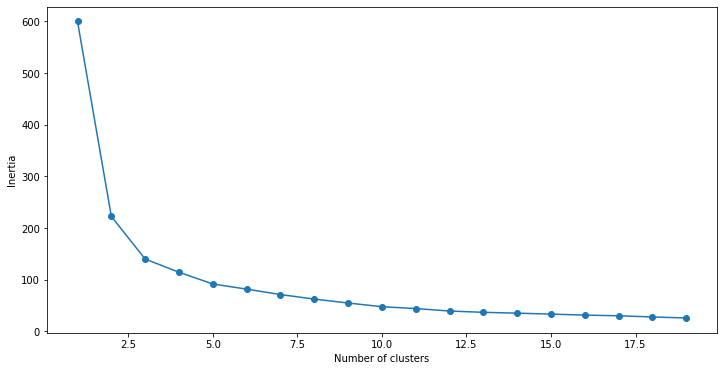

In [8]:
#We got an inertia value of almost 222. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

#We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. 
#We will store the inertia value of each model and then plot it to visualize the result:

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', max_iter = 300, n_init= 10)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [9]:
#Can you tell the optimum cluster value from this plot? Looking at the above elbow curve, we can choose any number of clusters between 3 to 5. Let’s set the number of clusters as 3 and fit the model:

# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init= 10)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [10]:
# show total of cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    52
1    50
0    48
Name: cluster, dtype: int64

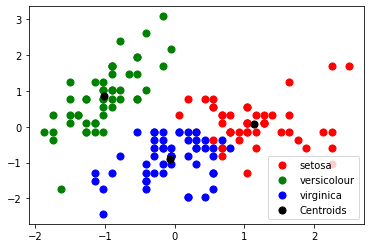

In [11]:
# plot the data
plt.scatter(data_scaled[pred == 0, 0], data_scaled[pred == 0, 1], s=50, c = 'red', label = 'setosa')
plt.scatter(data_scaled[pred == 1, 0], data_scaled[pred == 1, 1], s=50, c = 'green', label = 'versicolour')
plt.scatter(data_scaled[pred == 2, 0], data_scaled[pred == 2, 1], s=50, c = 'blue', label = 'virginica')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50, c='black', label = 'Centroids')

plt.legend()
plt.show()

In [12]:
'''So far, we discussed the classic k-means algorithm that uses a random seed to
place the initial centroids, which can sometimes result in bad clusterings or slow
convergence if the initial centroids are chosen poorly

One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the
best performing model in terms of the SSE. Another strategy is to place the initial
centroids far away from each other via the k-means++ algorithm, which leads
to better and more consistent results than the classic k-means ('''

'So far, we discussed the classic k-means algorithm that uses a random seed to\nplace the initial centroids, which can sometimes result in bad clusterings or slow\nconvergence if the initial centroids are chosen poorly\n\nOne way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the\nbest performing model in terms of the SSE. Another strategy is to place the initial\ncentroids far away from each other via the k-means++ algorithm, which leads\nto better and more consistent results than the classic k-means ('

In [13]:
def predict_result(result):
  print(result)
  if result == 0:
    return "It is setosa"
  elif result == 1:
    return "It is versicolor"
  else:
    return "It is virginica"

In [14]:
new_data = np.array([[5.4, 1.8, 2.1, 4.9]])    
new_data_scaled = scaler.transform(new_data)
my_pred = kmeans.predict(new_data_scaled)
predict_result(my_pred)

[2]


'It is virginica'

Therefore, I came of my_data = [5.4, 1.8, 2.1, 4.9], the prediction it is setosa